<a href="https://colab.research.google.com/github/KunalRoutray/Deep-Learning/blob/main/NN_with_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
#from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


2.Preprocess the Dataset



In [2]:
# Get the data
url='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data=pd.read_csv(url,delimiter=';')


In [3]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


3.Perform EDA

In [6]:
X=data.drop('quality',axis=1)
y=data['quality']

print(X.shape)
print(y.shape)


(1599, 11)
(1599,)


In [7]:
print(y)

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64


In [8]:
#One-hot encoding

OHE=OneHotEncoder(sparse_output=False)
y_encoded=OHE.fit_transform(y.values.reshape(-1,1))
print(y_encoded)


[[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


In [9]:
# split training and test split
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)


In [10]:
#scaling

scaler=StandardScaler()
#scaler.fit(X_train)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


4.Build Model

In [11]:
# create the MLP model

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.regularizers import l1,l2
model=Sequential()
model.add(Input(shape=(X_train.shape[1],)))

model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,590 (45.27 KB)

 Trainable params: 11,590 (45.27 KB)

 Non-trainable params: 0 (0.00 B)

5.Train Model with Regularizer

In [12]:
#from tensorflow.keras.callbacks import EarlyStopping

early_stopping=tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=5,
                                                        restore_best_weights=True)
optimizer = tensorflow.keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train_scaled,y_train,
                  epochs=50,
                  validation_split=0.2,
                  callbacks=[early_stopping],
                  verbose=1)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.3795 - loss: 1.5539 - val_accuracy: 0.6094 - val_loss: 1.0199
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5451 - loss: 1.0926 - val_accuracy: 0.6797 - val_loss: 0.9149
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5963 - loss: 1.0426 - val_accuracy: 0.6680 - val_loss: 0.8984
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6066 - loss: 0.9856 - val_accuracy: 0.6523 - val_loss: 0.8717
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6119 - loss: 0.9654 - val_accuracy: 0.6680 - val_loss: 0.8740
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5963 - loss: 0.9123 - val_accuracy: 0.6562 - val_loss: 0.8674
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6065 - loss: 0.9626 - val_accuracy: 0.6680 - val_loss: 0.8517
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6186 - loss: 0.9391 - val_accuracy: 0.6719 - val_loss

6.Plot Loss and Accuracy Curve



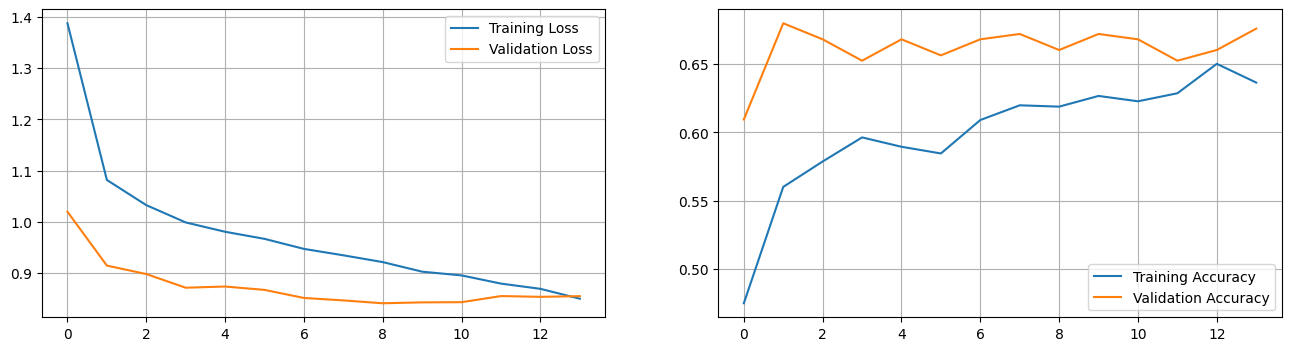

In [13]:
#printing training an validation loss/accuracy
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.grid()


7.Classification Report



In [14]:
#prediction
y_pred=model.predict(X_test).round()


y_pred=np.argmax(y_pred, axis= 1)
y_test=np.argmax(y_test, axis= 1)

print('Accuracy:', accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
Accuracy: 0.4
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         0
           2       0.87      0.43      0.57       265
           3       0.08      0.26      0.12        39
           4       0.12      0.33      0.18        15
           5       0.00      0.00      0.00         0

    accuracy                           0.40       320
   macro avg       0.18      0.17      0.14       320
weighted avg       0.73      0.40      0.50       320



8.Confusion Matrix

[[  0   0   0   1   0   0]
 [  0   0   5   4   1   0]
 [  0   0 113  15   2   0]
 [  1   0 114  10   7   0]
 [  0   0  30   7   5   0]
 [  0   0   3   2   0   0]]


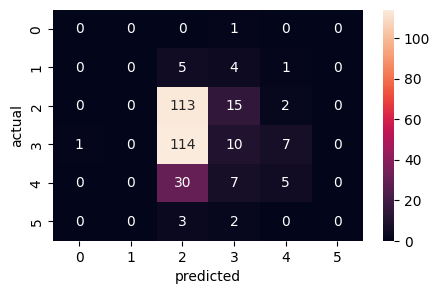

In [15]:
cm=confusion_matrix(y_test,y_pred)

print(cm)
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('actual')

plt.show()